# Simpson's Paradox

In [1]:
try:
    import jax
except:
    %pip install jax jaxlib
    import jax
import jax.numpy as jnp

try:
    import matplotlib.pyplot as plt
except:
    %pip install matplotlib
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    %pip install seaborn
    import seaborn as sns

try:
    from scipy import stats
except:
    %pip install scipy
    from scipy import stats

import itertools

In [2]:
import os

LATEXIFY = "LATEXIFY" in os.environ

if LATEXIFY:
    import sys

    sys.path.append("scripts")  # Don't change to "../scripts", instead, run this nb from repo's root with ipython
    from plot_utils import latexify, savefig

    latexify(width_scale_factor=1)

In [3]:
def make_graph(df, x_col, y_col, groupby_col, save_name, fig=None):
    if fig is None:
        fig, ax = plt.subplots(ncols=2, sharey=True)

    palette = itertools.cycle(sns.color_palette())
    scatter_kws = {"s": 10, "alpha": 0.7}

    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])

    sns.regplot(
        x=x_col,
        y=y_col,
        data=df,
        line_kws={"label": f"All {groupby_col} \n R =  {r_value:0.2f}"},
        ci=1,
        ax=ax[0],
        color=next(palette),
        scatter_kws=scatter_kws,
    )

    for group in df[groupby_col].unique():
        subset_data = df[df[groupby_col] == group]
        subset_data = subset_data.dropna()
        slope, intercept, r_value, p_value, std_err = stats.linregress(subset_data[x_col], subset_data[y_col])

        sns.regplot(
            x=x_col,
            y=y_col,
            data=subset_data,
            line_kws={"label": f"{group} \n R =  {r_value:0.2f}"},
            ci=1,
            ax=ax[1],
            color=next(palette),
            scatter_kws=scatter_kws,
        )

    legend = fig.legend(
        title="Species",
        loc="upper center",
        bbox_to_anchor=(1.15, 1.05),
        ncol=1,
        fancybox=True,
        shadow=False,
    )

    ax[1].set_ylabel("")
    fig.tight_layout()
    sns.despine()
    if LATEXIFY and len(save_name) > 0:
        savefig(save_name, bbox_extra_artists=(legend,), bbox_inches="tight")
        # savefig(save_name)

    return fig, ax

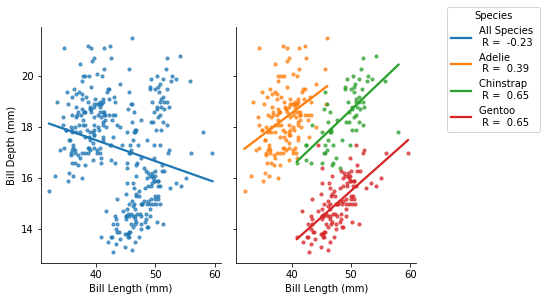

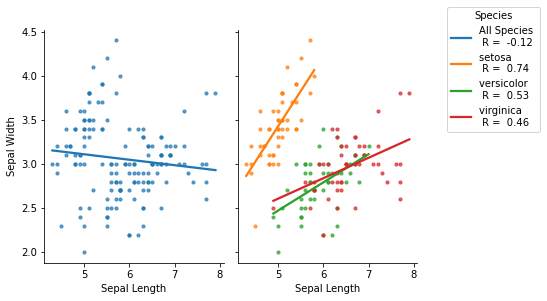

In [4]:
column_mapping = {
    "penguins": {
        "species": "Species",
        "bill_length_mm": "Bill Length (mm)",
        "bill_depth_mm": "Bill Depth (mm)",
    },
    "iris": {
        "species": "Species",
        "sepal_length": "Sepal Length",
        "sepal_width": "Sepal Width",
    },
}

dataset_cols = {
    "penguins": {
        "x_col": "Bill Length (mm)",
        "y_col": "Bill Depth (mm)",
        "groupby_col": "Species",
    },
    "iris": {"x_col": "Sepal Length", "y_col": "Sepal Width", "groupby_col": "Species"},
}

for dataset in column_mapping.keys():
    df = sns.load_dataset(dataset)
    df = df.rename(columns=column_mapping[dataset])
    df = df.dropna()
    make_graph(
        df,
        dataset_cols[dataset]["x_col"],
        dataset_cols[dataset]["y_col"],
        dataset_cols[dataset]["groupby_col"],
        f"simpson_{dataset}_latexified.pdf",
    )